In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [3]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,27/08/2020,27,8,2020,55,4,Afghanistan,AF,AFG,38041757.0,Asia,2.053007
1,26/08/2020,26,8,2020,1,0,Afghanistan,AF,AFG,38041757.0,Asia,2.108210
2,25/08/2020,25,8,2020,71,10,Afghanistan,AF,AFG,38041757.0,Asia,2.670749
3,24/08/2020,24,8,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
4,23/08/2020,23,8,2020,105,2,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
...,...,...,...,...,...,...,...,...,...,...,...,...
38906,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38907,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38908,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
38909,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [4]:
covid.to_csv('covid_data.csv')

In [5]:
covid.drop("countryterritoryCode",axis=1,inplace=True)
covid.drop("day",axis=1,inplace=True)
covid.drop("month",axis=1,inplace=True)
covid.drop("year",axis=1,inplace=True)
covid.drop("popData2019",axis=1,inplace=True)

In [6]:
covid.drop("geoId",axis=1,inplace=True)
covid

,dateRep,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,27/08/2020,55,4,Afghanistan,Asia,2.053007
1,26/08/2020,1,0,Afghanistan,Asia,2.108210
2,25/08/2020,71,10,Afghanistan,Asia,2.670749
3,24/08/2020,0,0,Afghanistan,Asia,2.484112
4,23/08/2020,105,2,Afghanistan,Asia,2.484112
...,...,...,...,...,...,...
38906,25/03/2020,0,0,Zimbabwe,Africa,NaN
38907,24/03/2020,0,1,Zimbabwe,Africa,NaN
38908,23/03/2020,0,0,Zimbabwe,Africa,NaN
38909,22/03/2020,1,0,Zimbabwe,Africa,NaN


In [7]:
covid.rename(columns={'dateRep':'date','countriesAndTerritories':'country', 'continentExp':'continent'}, inplace=True)

In [8]:
covid

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,27/08/2020,55,4,Afghanistan,Asia,2.053007
1,26/08/2020,1,0,Afghanistan,Asia,2.108210
2,25/08/2020,71,10,Afghanistan,Asia,2.670749
3,24/08/2020,0,0,Afghanistan,Asia,2.484112
4,23/08/2020,105,2,Afghanistan,Asia,2.484112
...,...,...,...,...,...,...
38906,25/03/2020,0,0,Zimbabwe,Africa,NaN
38907,24/03/2020,0,1,Zimbabwe,Africa,NaN
38908,23/03/2020,0,0,Zimbabwe,Africa,NaN
38909,22/03/2020,1,0,Zimbabwe,Africa,NaN


In [9]:
covid1 = covid.iloc[::-1]
covid1

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
38910,21/03/2020,1,0,Zimbabwe,Africa,NaN
38909,22/03/2020,1,0,Zimbabwe,Africa,NaN
38908,23/03/2020,0,0,Zimbabwe,Africa,NaN
38907,24/03/2020,0,1,Zimbabwe,Africa,NaN
38906,25/03/2020,0,0,Zimbabwe,Africa,NaN
...,...,...,...,...,...,...
4,23/08/2020,105,2,Afghanistan,Asia,2.484112
3,24/08/2020,0,0,Afghanistan,Asia,2.484112
2,25/08/2020,71,10,Afghanistan,Asia,2.670749
1,26/08/2020,1,0,Afghanistan,Asia,2.108210


In [10]:
covid1.head()

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
38910,21/03/2020,1,0,Zimbabwe,Africa,NaN
38909,22/03/2020,1,0,Zimbabwe,Africa,NaN
38908,23/03/2020,0,0,Zimbabwe,Africa,NaN
38907,24/03/2020,0,1,Zimbabwe,Africa,NaN
38906,25/03/2020,0,0,Zimbabwe,Africa,NaN


In [11]:
country_wise = covid1.groupby(["country"]).sum()
country_wise

,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
country,,,
Afghanistan,38126,1401,1390.508856
Albania,8927,263,3853.443249
Algeria,42619,1465,1300.815965
Andorra,1098,53,17635.244234
Angola,2332,103,88.681021
...,...,...,...
Vietnam,1034,30,14.343456
Western_Sahara,766,1,1827.771273
Yemen,1930,560,90.793055


In [12]:
k=country_wise.nlargest(10, ['cases'])
k.drop("deaths",axis=1,inplace=True)
k.drop("Cumulative_number_for_14_days_of_COVID-19_cases_per_100000",axis=1,inplace=True)
k

,cases
country,
United_States_of_America,5821876
Brazil,3717156
India,3310234
Russia,970865
South_Africa,615701
Peru,613378
Mexico,573888
Colombia,572270
Spain,419849


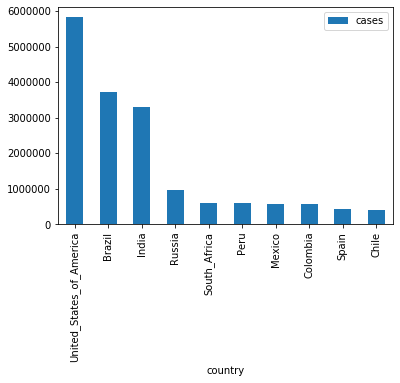

In [13]:
k.plot.bar()
plt.savefig("Top 10 countries in COVID-19 cases.png")

In [14]:
l=country_wise.nlargest(10, ['deaths'])
l.drop("cases",axis=1,inplace=True)
l.drop("Cumulative_number_for_14_days_of_COVID-19_cases_per_100000",axis=1,inplace=True)
l

,deaths
country,
United_States_of_America,179714
Brazil,117665
Mexico,62076
India,60472
United_Kingdom,41465
Italy,35458
France,30544
Spain,28971
Peru,28124


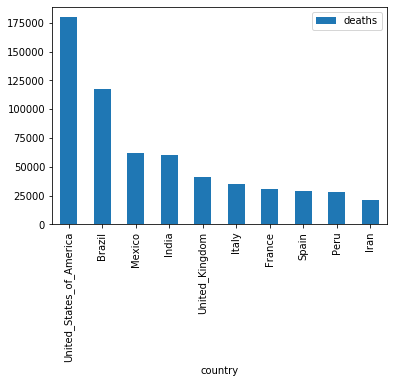

In [15]:
l.plot.bar()
plt.savefig("Top 10 countries in COVID-19 deaths.png")

In [16]:
m=country_wise.nlargest(10, ['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])
m.drop("deaths",axis=1,inplace=True)
m.drop("cases",axis=1,inplace=True)
m

,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
country,
Qatar,57366.888048
Bahrain,40844.242257
Chile,28914.319755
San_Marino,28850.898325
Panama,27648.995394
Kuwait,26083.192678
Peru,24233.306804
United_States_of_America,23608.242017
Oman,23529.464972


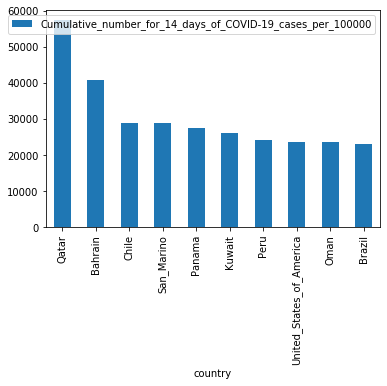

In [17]:
m.plot.bar()
plt.savefig("Cumulative_number_for_14_days_of_COVID-19_cases_per_100000")